In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

C:\Users\Renuka DJ\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('wine.xls',index_col=None, header=None)
df.columns = [  'class','alcohol','malicAcid','ash','ashalcalinity','magnesium','totalPhenols','flavanoids','nonFlavanoidPhenols','proanthocyanins','colorIntensity','hue','od280_od315','proline']
df.head()

,class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#Getting dimensions of the data
df.shape

(178, 14)

In [4]:
#Let's understand the data types present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                178 non-null    int64  
 1   alcohol              178 non-null    float64
 2   malicAcid            178 non-null    float64
 3   ash                  178 non-null    float64
 4   ashalcalinity        178 non-null    float64
 5   magnesium            178 non-null    int64  
 6   totalPhenols         178 non-null    float64
 7   flavanoids           178 non-null    float64
 8   nonFlavanoidPhenols  178 non-null    float64
 9   proanthocyanins      178 non-null    float64
 10  colorIntensity       178 non-null    float64
 11  hue                  178 non-null    float64
 12  od280_od315          178 non-null    float64
 13  proline              178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
print('All data types are numerical and there are no null values.')

All data types are numerical and there are no null values.


In [6]:
#Getting statistical summary of the data
df.describe()

,class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
print("For this data we will not do the outlier treatment as the data is small.")

For this data we will not do the outlier treatment as the data is small.


In [8]:
#Checking correlation of features with target and among themselves.
df.corr()

,class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malicAcid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
ashalcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
totalPhenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonFlavanoidPhenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [9]:
#Identify 3 features with lowest correlation with target
lc=['ash','magnesium','colorIntensity']
#We need to check if these features are significantly different among classes 1,2,3.
df['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

In [10]:
#Dividing the data as per class
df1=df[df['class']==1]
df2=df[df['class']==2]
df3=df[df['class']==3]

In [11]:
from scipy.stats import f_oneway
f_oneway(df1['ash'],df2['ash'],df3['ash'])

F_onewayResult(statistic=13.312901199991039, pvalue=4.149967974793239e-06)

In [12]:
print("Since the feature with lowest correlation with target is significant we know that the remaining features will be significant, so we keep them all.")

Since the feature with lowest correlation with target is significant we know that the remaining features will be significant, so we keep them all.


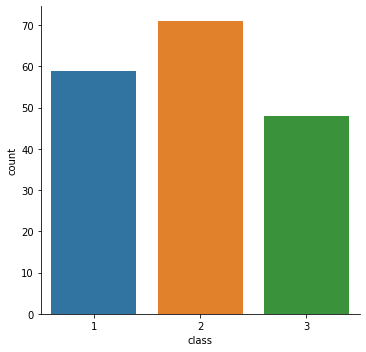

In [13]:
#Basic EDA for wine data set.
#Checking distribution of classes
sns.catplot(x='class',data=df,kind='count')

In [14]:
print("We see class 2 dominates in the sample followed by class 1 and class 3 respectively.")

We see class 2 dominates in the sample followed by class 1 and class 3 respectively.


In [15]:
pairdf=df.copy()
pairdf['class']=pairdf['class'].replace({1:'a',2:'b',3:'c'})
pairdf.head()

,class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,a,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,a,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,a,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,a,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,a,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


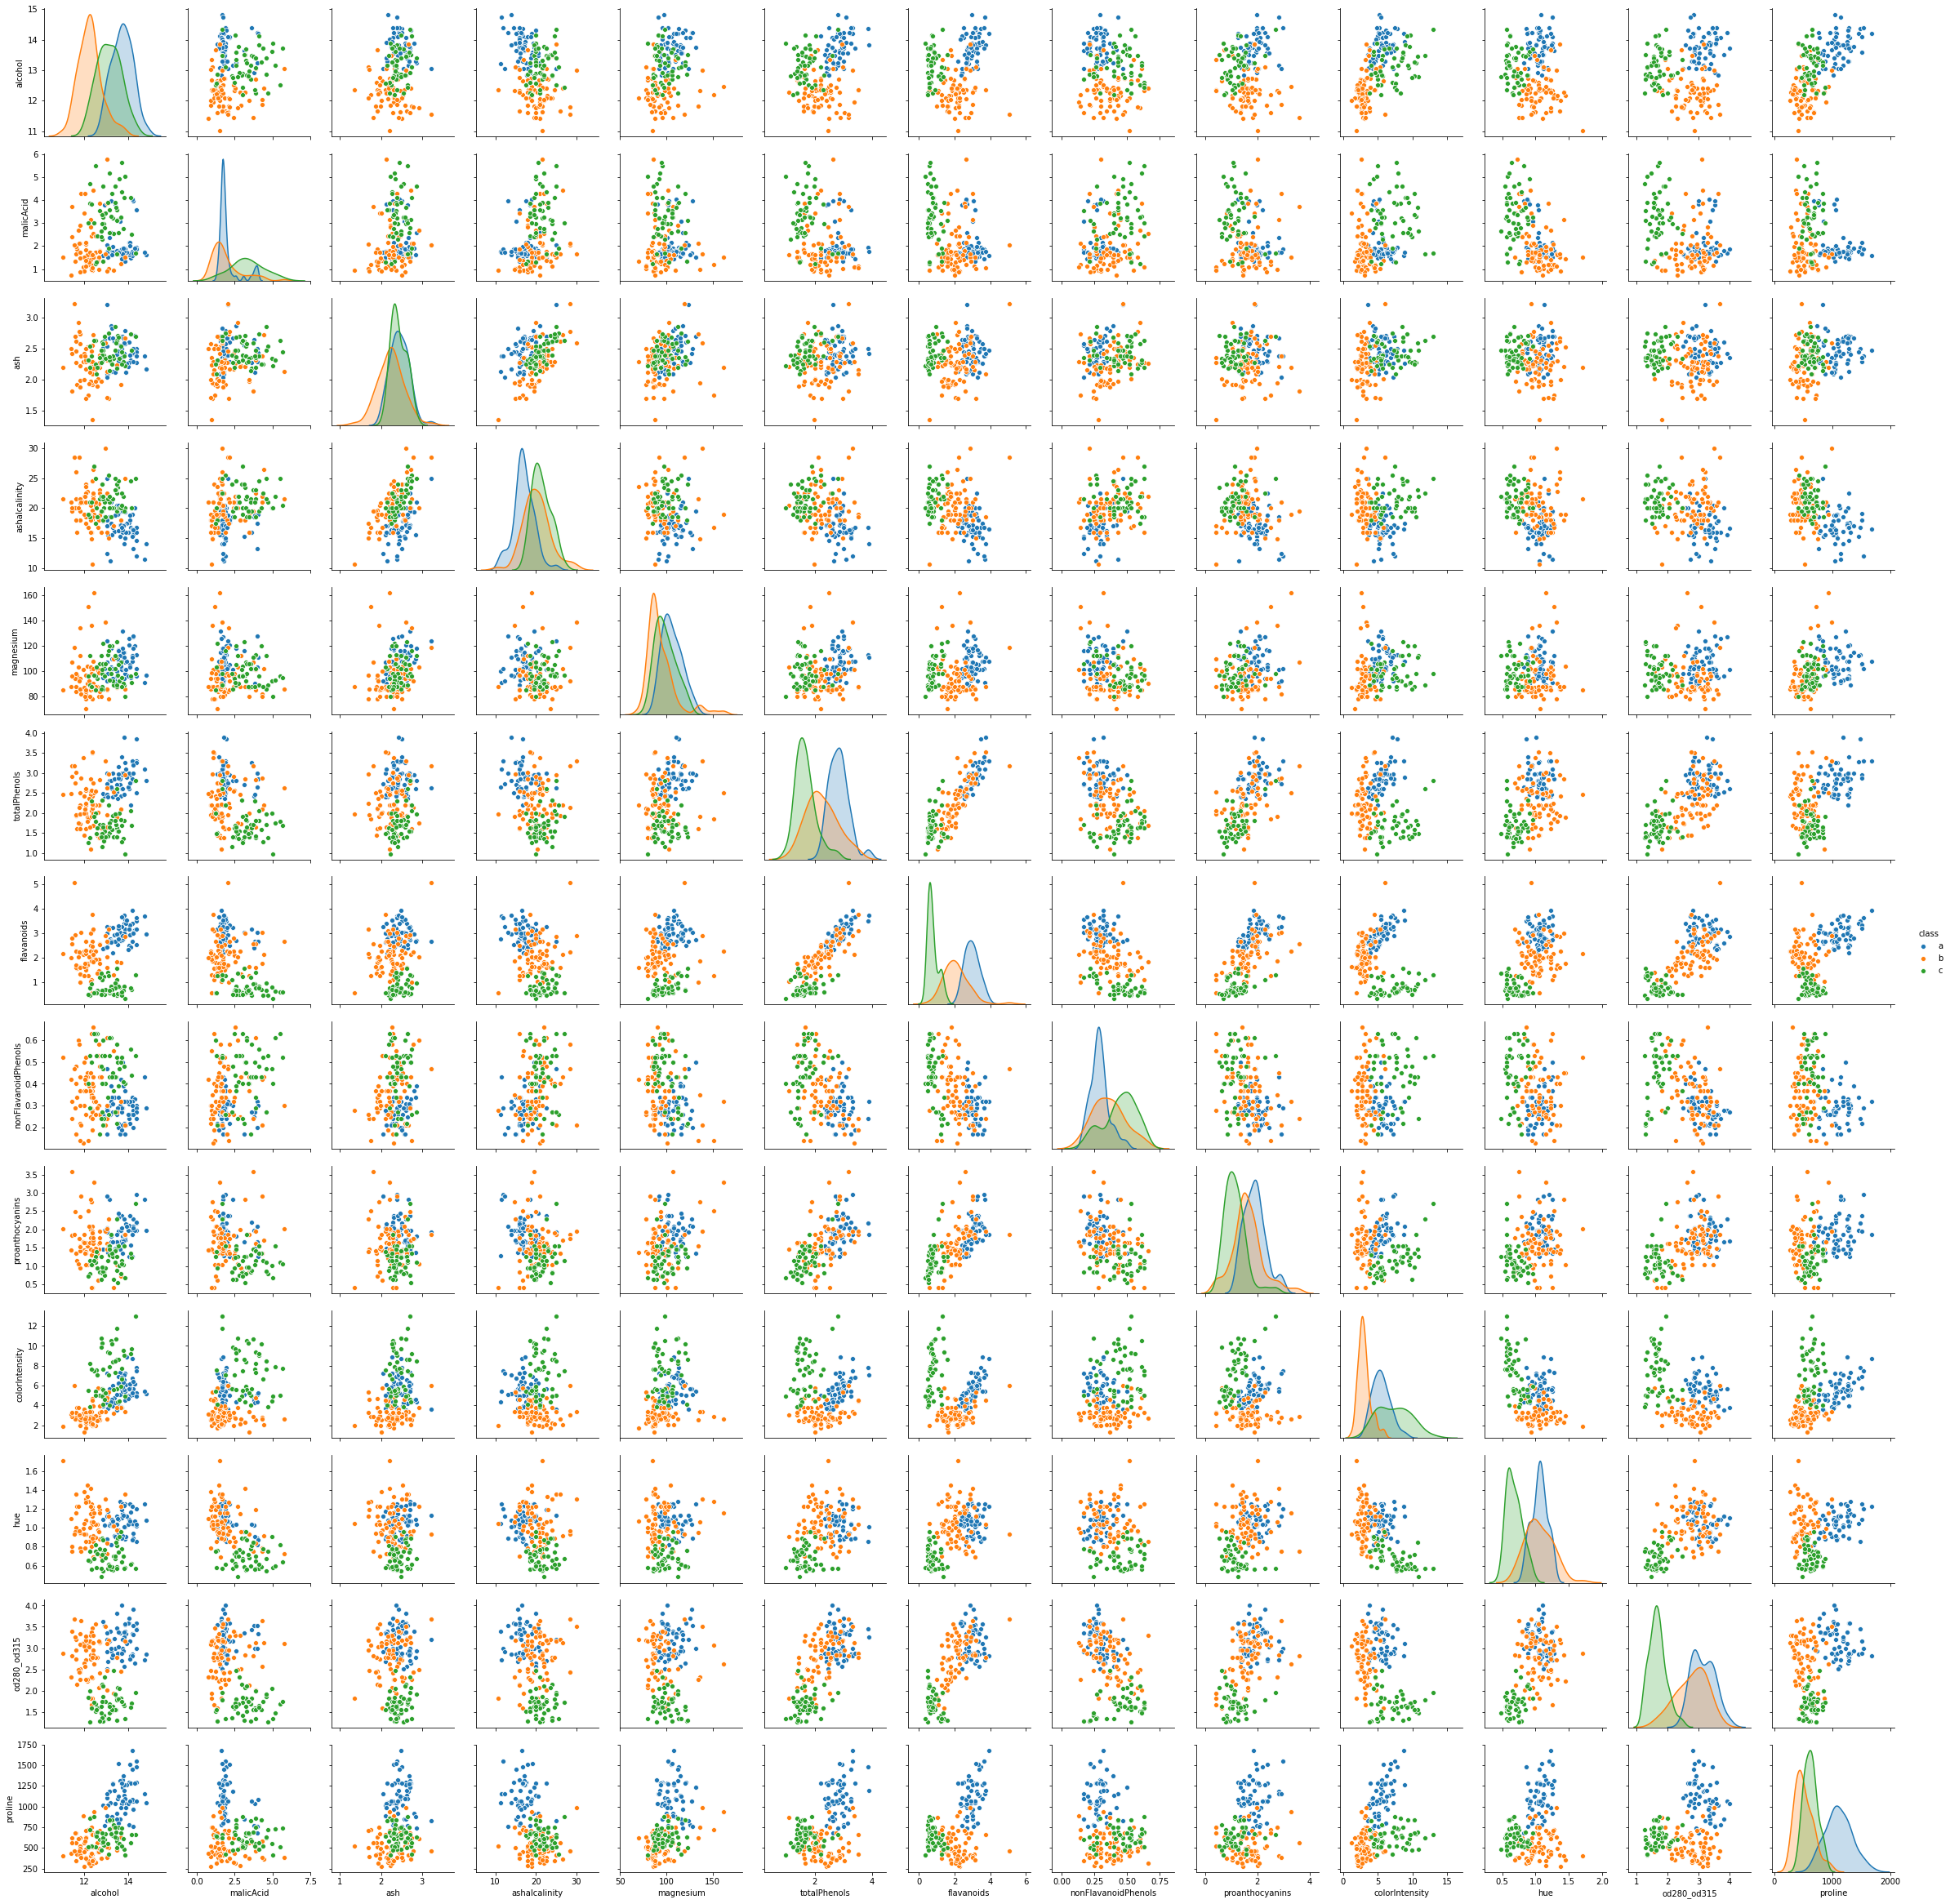

In [16]:
sns.pairplot(pairdf,hue='class',diag_kind='kde')

In [17]:
print("Visually 'od280_od315' and 'flavanoids' Versus proline seem to differentiate between different wine class to a great extent. ")

Visually 'od280_od315' and 'flavanoids' Versus proline seem to differentiate between different wine class to a great extent. 


In [18]:
pairdf.columns

Index(['class', 'alcohol', 'malicAcid', 'ash', 'ashalcalinity', 'magnesium',
       'totalPhenols', 'flavanoids', 'nonFlavanoidPhenols', 'proanthocyanins',
       'colorIntensity', 'hue', 'od280_od315', 'proline'],
      dtype='object')

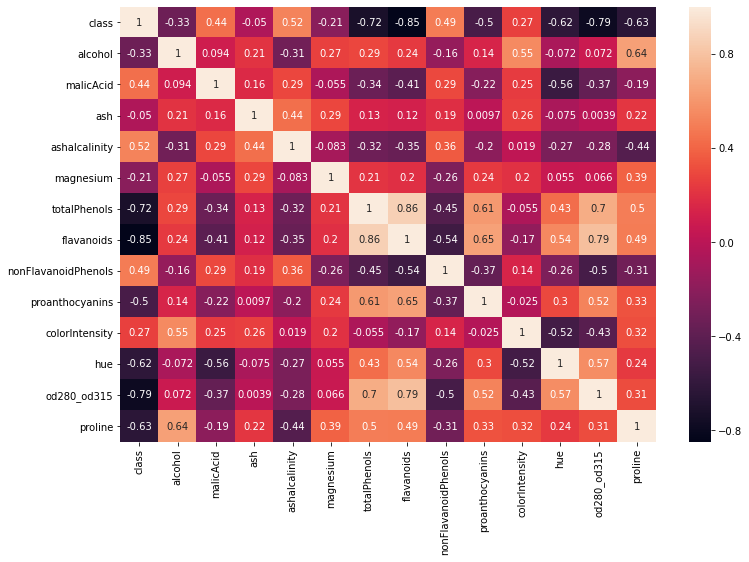

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [20]:
print('We can observe a strong negative correlation between class and features- flavanoids, totalPhenols,od280_od315 and proline. Other features show moderate to low correlation. ')

We can observe a strong negative correlation between class and features- flavanoids, totalPhenols,od280_od315 and proline. Other features show moderate to low correlation. 


In [21]:
#Data Preprocessing
inp=df.drop('class',axis=1)
out=df['class']

In [22]:
#Scaling, not necessary for logistic regression algorithm, but we will do it to make comparison of different algorithms possible.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inp_sc=sc.fit_transform(inp)
inp_sc=pd.DataFrame(inp_sc,columns=inp.columns)

### Logistic Regressor Algorithm

In [23]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(inp_sc,out)
pred=lr.predict(inp_sc)

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(out,pred))
print(confusion_matrix(out,pred))
print(classification_report(out,pred))

1.0
[[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        71
           3       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



In [25]:
print("Our Logistic Regression model displayed 100% accuracy on all its parameters. ")

Our Logistic Regression model displayed 100% accuracy on all its parameters. 


In [26]:
#Variation of logistic regression with train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inp_sc, out, test_size=0.3, random_state=42)

In [27]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [28]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9814814814814815
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [29]:
print("When we split our data into training and testing set, the accuracy score declined to 98.15%. Overall 1 sample was misclassified leading to an overall precision, recall and f1-score of 98%.")

When we split our data into training and testing set, the accuracy score declined to 98.15%. Overall 1 sample was misclassified leading to an overall precision, recall and f1-score of 98%.


In [30]:
#Variation of logistic regression with 5 fold cross validation. 
from sklearn.model_selection import cross_val_score
lr=LogisticRegression()
score=cross_val_score(lr,X_train,y_train,scoring='f1_weighted',cv=5,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [31]:
accuracy=score.mean()
bias_error=1-accuracy
variance_error=score.std()
accuracy,bias_error,variance_error

(0.9841122807017543, 0.015887719298245728, 0.019458402728635547)

In [32]:
print("There is slight improvement in overall performance over the previous model, with low bias and variance error.")

There is slight improvement in overall performance over the previous model, with low bias and variance error.


### K-Nearest Neighbor Algorithm

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
#We use GridSearchCV to find the best parameters for KNeighbors Classifier
from sklearn.model_selection import GridSearchCV
param={'n_neighbors':np.arange(1,100),'weights':['uniform','distance']}
grid=GridSearchCV(knn,param_grid=param,cv=5,scoring='f1_weighted')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [34]:
grid.best_params_

{'n_neighbors': 72, 'weights': 'distance'}

In [35]:
knn=KNeighborsClassifier(n_neighbors=72, weights='distance')

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=72, weights='distance')

In [37]:
knn.score(X_test,y_test)

1.0

In [38]:
knn.score(X_train,y_train)

1.0

In [39]:
y_pred=knn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [40]:
print("With 'n_neighbors': 72, 'weights': 'distance' as best parameters, KNN Model accurately predicts all records from training as well as testing set.")

With 'n_neighbors': 72, 'weights': 'distance' as best parameters, KNN Model accurately predicts all records from training as well as testing set.


### Naive Bayes Algorithm

In [41]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
score=cross_val_score(nb,X_train,y_train,cv=5,scoring='f1_weighted')

In [42]:
accuracy=np.mean(score)
bais_error=1-accuracy
variance_error=score.std()
accuracy,bais_error,variance_error

(0.9759238095238094, 0.024076190476190584, 0.03203843496790602)

In [43]:
print("In comparison to all the earlier models, Naive Bayes algorithm has a lower performance both in terms of efficiency and minimising error.")

In comparison to all the earlier models, Naive Bayes algorithm has a lower performance both in terms of efficiency and minimising error.


### Decision tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

#We use GridSearchCV to find the best parameters for Decision Tree Classifier
from sklearn.model_selection import GridSearchCV
param={'max_depth':np.arange(1,30),'criterion':['entropy','gini'],'min_samples_leaf':np.arange(1,20) }
grid=GridSearchCV(dt,param_grid=param,cv=5,scoring='f1_weighted')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='f1_weighted')

In [45]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 2}

In [46]:
dt_reg=DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf= 2)
dt_reg.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=20, min_samples_leaf=2)

In [47]:
dt_reg.score(X_train,y_train)

0.9919354838709677

In [48]:
dt_reg.score(X_test,y_test)

0.9814814814814815

In [49]:
y_pred=dt_reg.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9814814814814815
[[19  0  0]
 [ 0 21  0]
 [ 1  0 13]]
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      1.00      1.00        21
           3       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



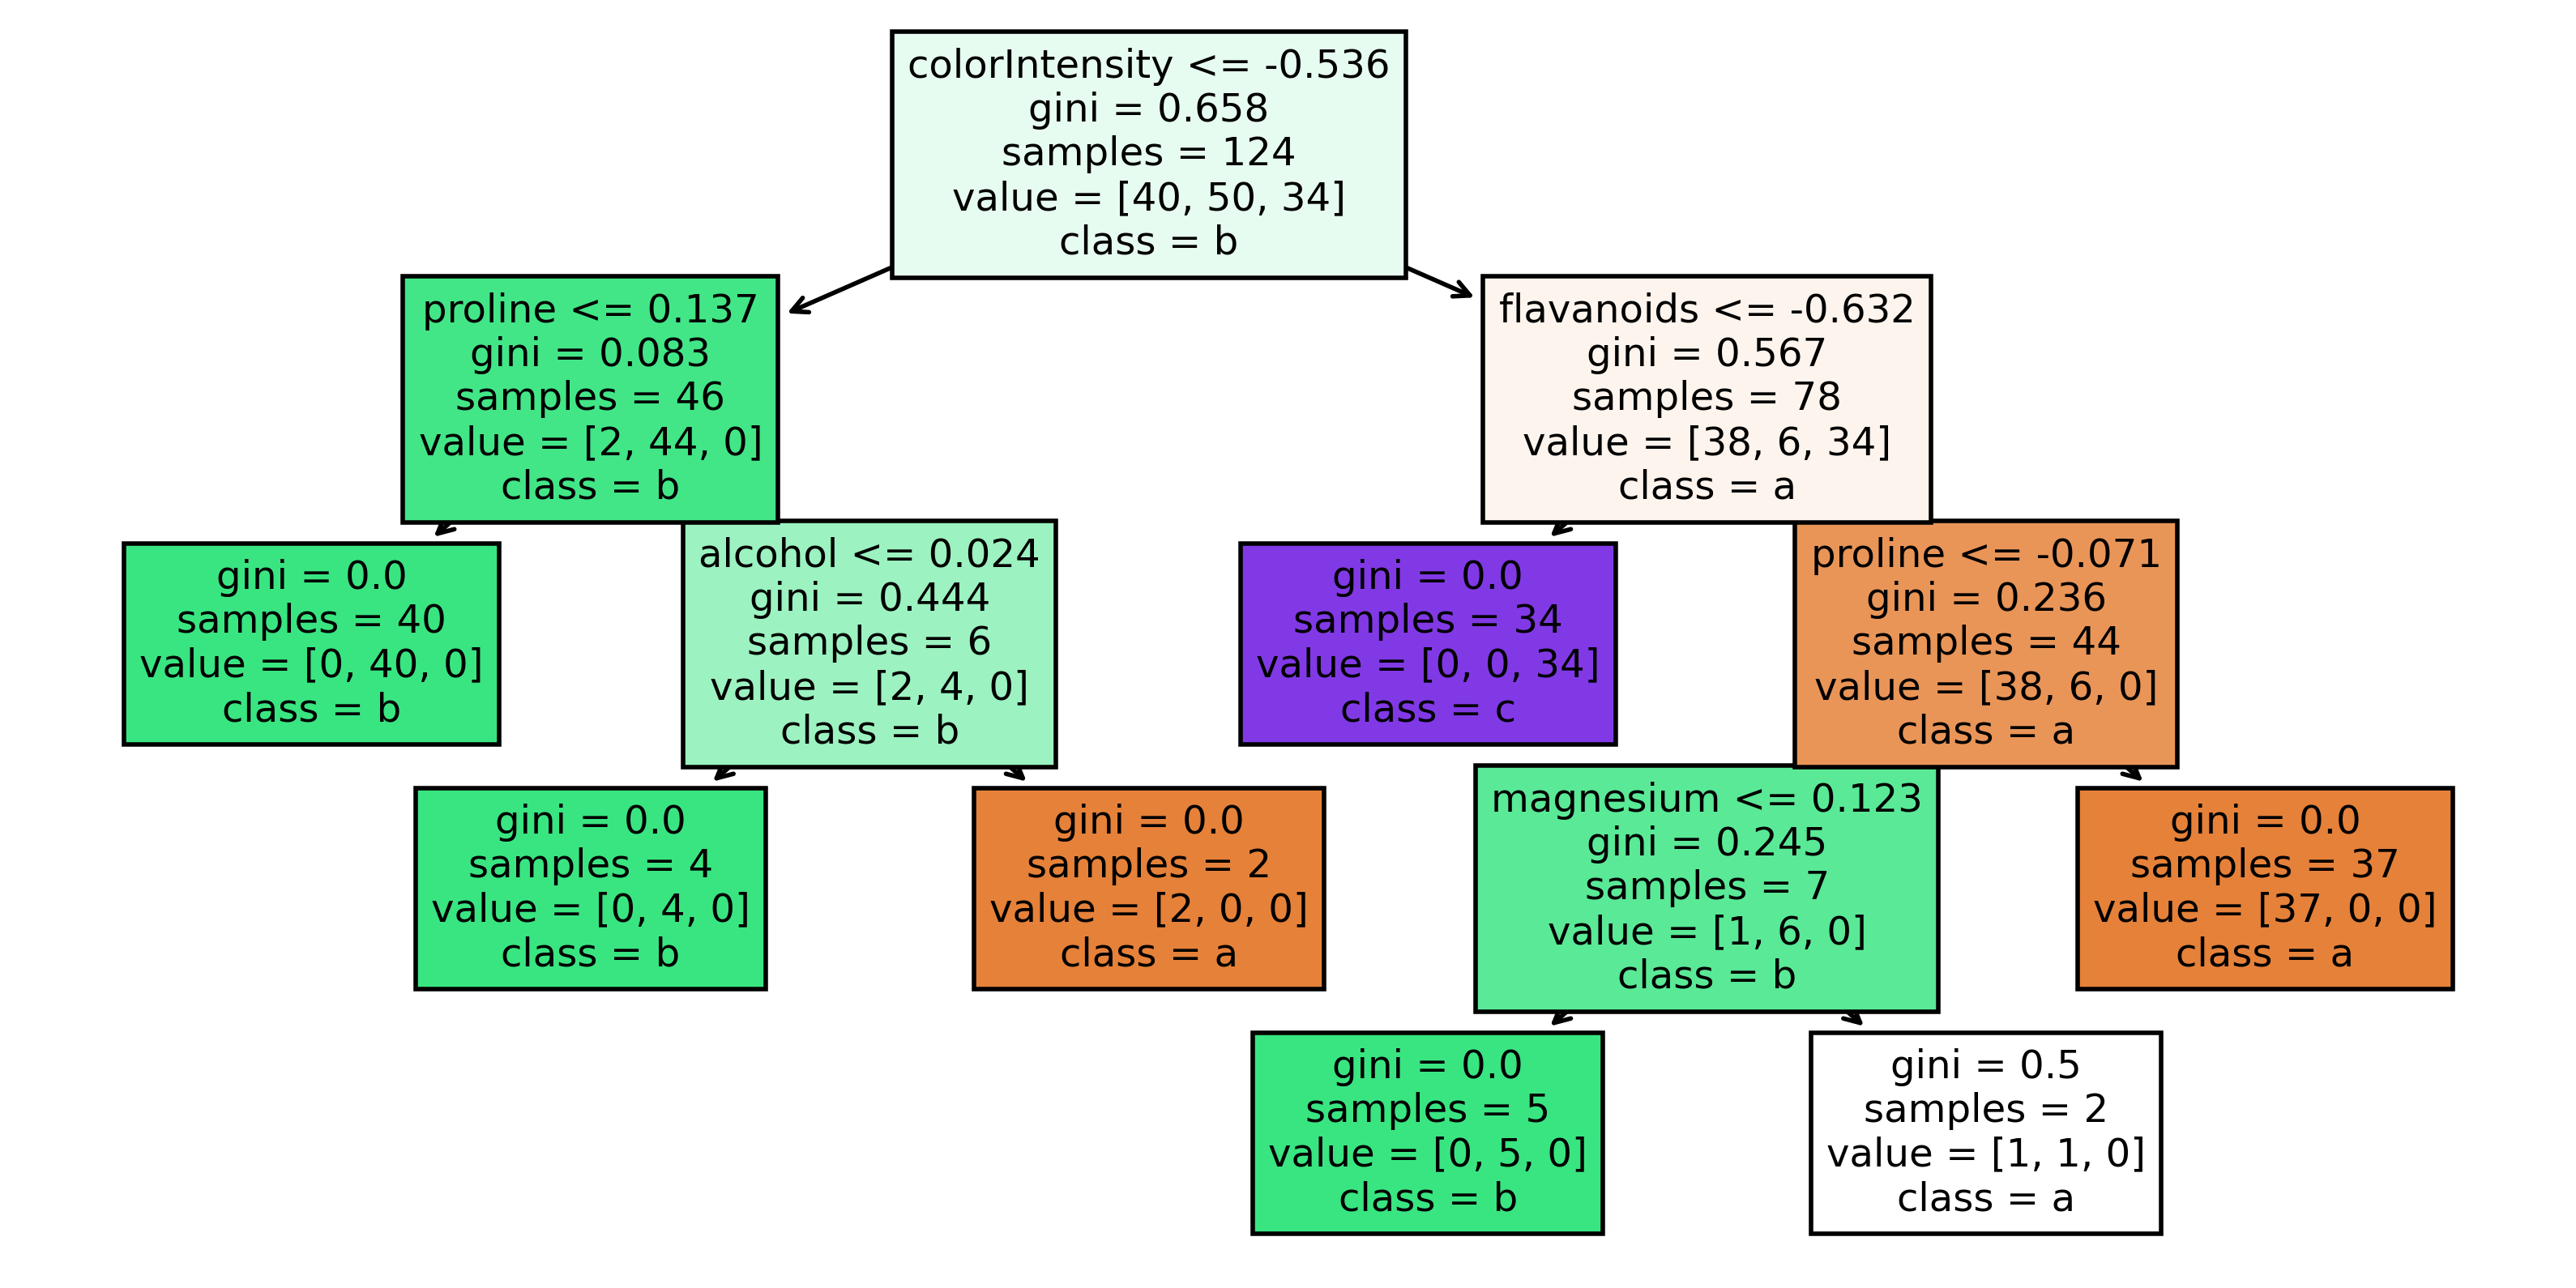

In [50]:
#Visualising the tree diagram. 
from sklearn import tree
fn=inp.columns
cn=['a','b','c']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,5),dpi=400)
tree.plot_tree(dt_reg,feature_names=fn,class_names=cn,filled=True)
fig.savefig('wine_quality.png')

In [51]:
print("The regularised Decision tree model with 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, acts with 96% efficiency. Total 2 records are misclassified.")

The regularised Decision tree model with 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, acts with 96% efficiency. Total 2 records are misclassified.


### Random Forest Algorithm

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
param={'n_estimators':np.arange(1,100),'criterion':['gini','entropy'],'max_depth':np.arange(2,5),'min_samples_leaf':np.arange(1,5)}
grid=GridSearchCV(rfc,param_grid=param,cv=5,scoring='f1_weighted')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [64]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'n_estimators': 18}

In [65]:
rfc=RandomForestClassifier(criterion= 'entropy',max_depth= 4,min_samples_leaf= 2,n_estimators= 18)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       n_estimators=18)

In [66]:
y_pred=rfc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [67]:
print("Random Forest Algorithm with parameters ('criterion': 'entropy','max_depth': 4,'min_samples_leaf': 2,'n_estimators': 18) gives 100% efficiency in classifying the quality of wine.")

Random Forest Algorithm with parameters ('criterion': 'entropy','max_depth': 4,'min_samples_leaf': 2,'n_estimators': 18) gives 100% efficiency in classifying the quality of wine.


In [103]:
models = []
models.append(('Logistic', lr))
models.append(('NaiveBayes', nb))
models.append(('KNN',knn))
models.append(('DecisionTree',dt))
models.append(('RandomForest',rfc))
models

[('Logistic', LogisticRegression()),
 ('NaiveBayes', GaussianNB()),
 ('KNN', KNeighborsClassifier(n_neighbors=72, weights='distance')),
 ('DecisionTree', DecisionTreeClassifier()),
 ('RandomForest',
  RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                         n_estimators=18))]

In [104]:
models.append(('Stacked',stacked))

Logistic: 0.015811 (0.000750)
NaiveBayes: 0.048285 (0.000567)
KNN: 0.057287 (0.006306)
DecisionTree: 0.139385 (0.001546)
RandomForest: 0.032063 (0.000182)


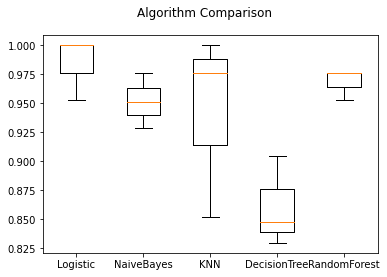

In [76]:
# evaluate each model in turn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
results = []
names = []
for name, model in models:
	kfold = KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = cross_val_score(model, X_train, y_train,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, 1-np.mean(cv_results),np.var(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [77]:
print('It can be observed that Logistic regression based model has lowest bias error while Random Forest based model has lowest variance error. So we try to create a stacked model with the objective of having low bias and variance error.')

It can be observed that Logistic regression based model has lowest bias error while Random Forest based model has lowest variance error. So we try to create a stacked model with the objective of having low bias and variance error.


### Voting Classifier or Stacked Model

In [95]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[('Logistic',lr),('RandomForest'),rfc],voting='soft')


In [125]:
stacked = VotingClassifier(estimators = [('Logistic',lr),
                                         ('RandomForest', rfc)],voting='soft')


Logistic:0.984189 0.015811 (0.000750)
NaiveBayes:0.951715 0.048285 (0.000567)
KNN:0.942713 0.057287 (0.006306)
DecisionTree:0.868622 0.131378 (0.002799)
RandomForest:0.959703 0.040297 (0.000779)
Stacked:0.975852 0.024148 (0.000000)


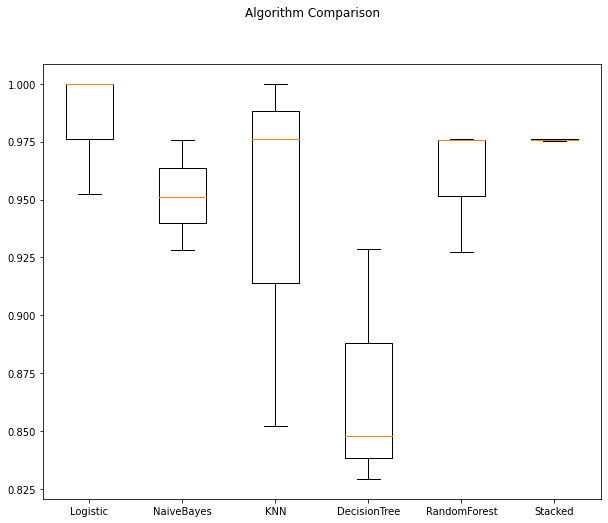

In [126]:
# evaluate each model in turn

results = []
names = []
for name, model in models:
	kfold = KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = cross_val_score(model, X_train, y_train,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("%s:%f %f (%f)" % (name,np.mean(cv_results), 1-np.mean(cv_results),np.var(cv_results,ddof=1)))
  
   # boxplot algorithm comparison
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [127]:
print('Though there is a slight drop in overall efficiency, the stacked model can accurately classify the wine quality 97.58% of times with low bias error and no variance error. ')

Though there is a slight drop in overall efficiency, the stacked model can accurately classify the wine quality 97.58% of times with low bias error and no variance error. 


In [128]:
print('Based on the observations above, we use Stacked model for deployment.')

Based on the observations above, we use Stacked model for deployment.
